In [1]:
import requests
import base64
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
files = {
    'file': ('2310.01889v4.pdf', open('../stress-test/2310.01889v4.pdf', 'rb'), 'application/pdf'),
}

r = requests.post('http://localhost:7088/doc_layout', files=files)
r = r.json()
r['stats']

{'total_page': 16,
 'infer_time_taken': 1.1241307258605957,
 'toimage_time_taken': 0.444166898727417,
 'page_per_second': 14.233220062329451}

In [3]:
r['result'][0].keys()

dict_keys(['classes', 'coordinates', 'img'])

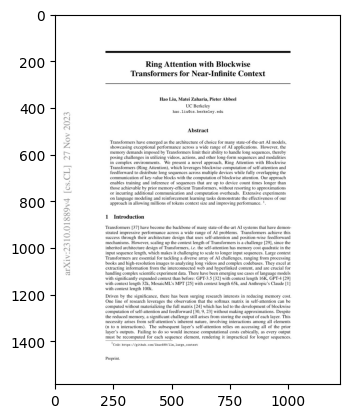

In [4]:
image_data = base64.b64decode(r['result'][0]['img'])
image = Image.open(BytesIO(image_data))
image_np = np.array(image)
plt.imshow(image_np)
plt.show()

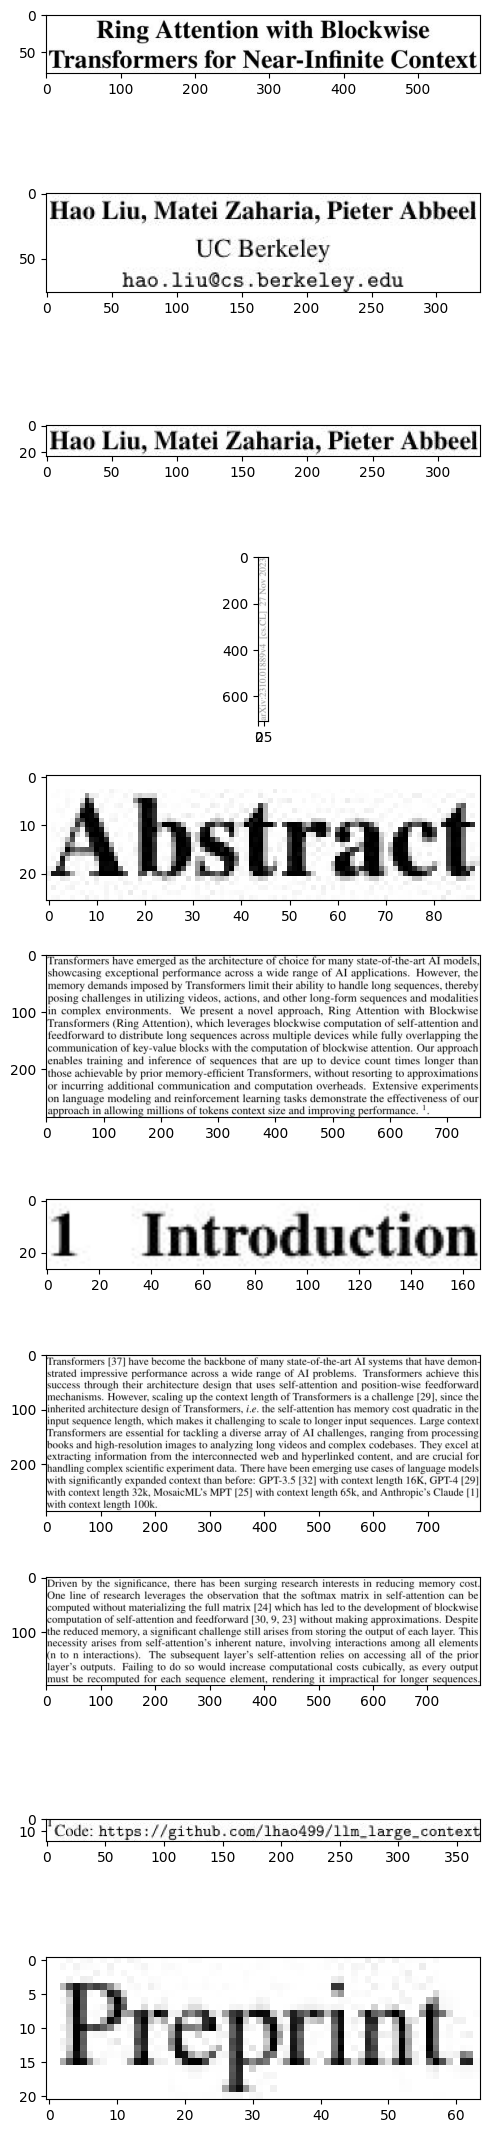

In [5]:
boxes = r['result'][0]['coordinates']

fig, axs = plt.subplots(len(boxes), 1, figsize=(5, len(boxes) * 2))

for i, box in enumerate(boxes):
    y_min, y_max = box['y_min'], box['y_max']
    x_min, x_max = box['x_min'], box['x_max']
    cropped_img = image_np[y_min:y_max, x_min:x_max]

    axs[i].imshow(cropped_img)

plt.tight_layout()
plt.show()